# Задача - девятый семинар

Точка единичной массы может двигаться без трения по горизонтальной оси Ox. Построить в расширенном фазовом пространстве этой системы трубку прямых путей, исходящую из контура C0 - окружности единичного радиуса, лежащей в плоскости t = 0 и центром в начале координат.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.pyplot import cm

Параметрически, трубка задётся формулами:
$$
x(t, \alpha) = t \operatorname{sin}(\alpha) + \operatorname{cos}(\alpha) \\
p(t, \alpha) = \operatorname{sin}(\alpha)
$$

### В плоскости x, p

Посмотрим, как изменяется трубка с течением времени, при рассмотрении плоскости $(p, t)$

In [2]:
t = np.arange(0, 1.1, 0.1)
alpha = np.linspace(0, 2 * np.pi, 1000)

x_different_t = t[:, np.newaxis] * np.sin(alpha) + np.cos(alpha)
p = np.sin(alpha)


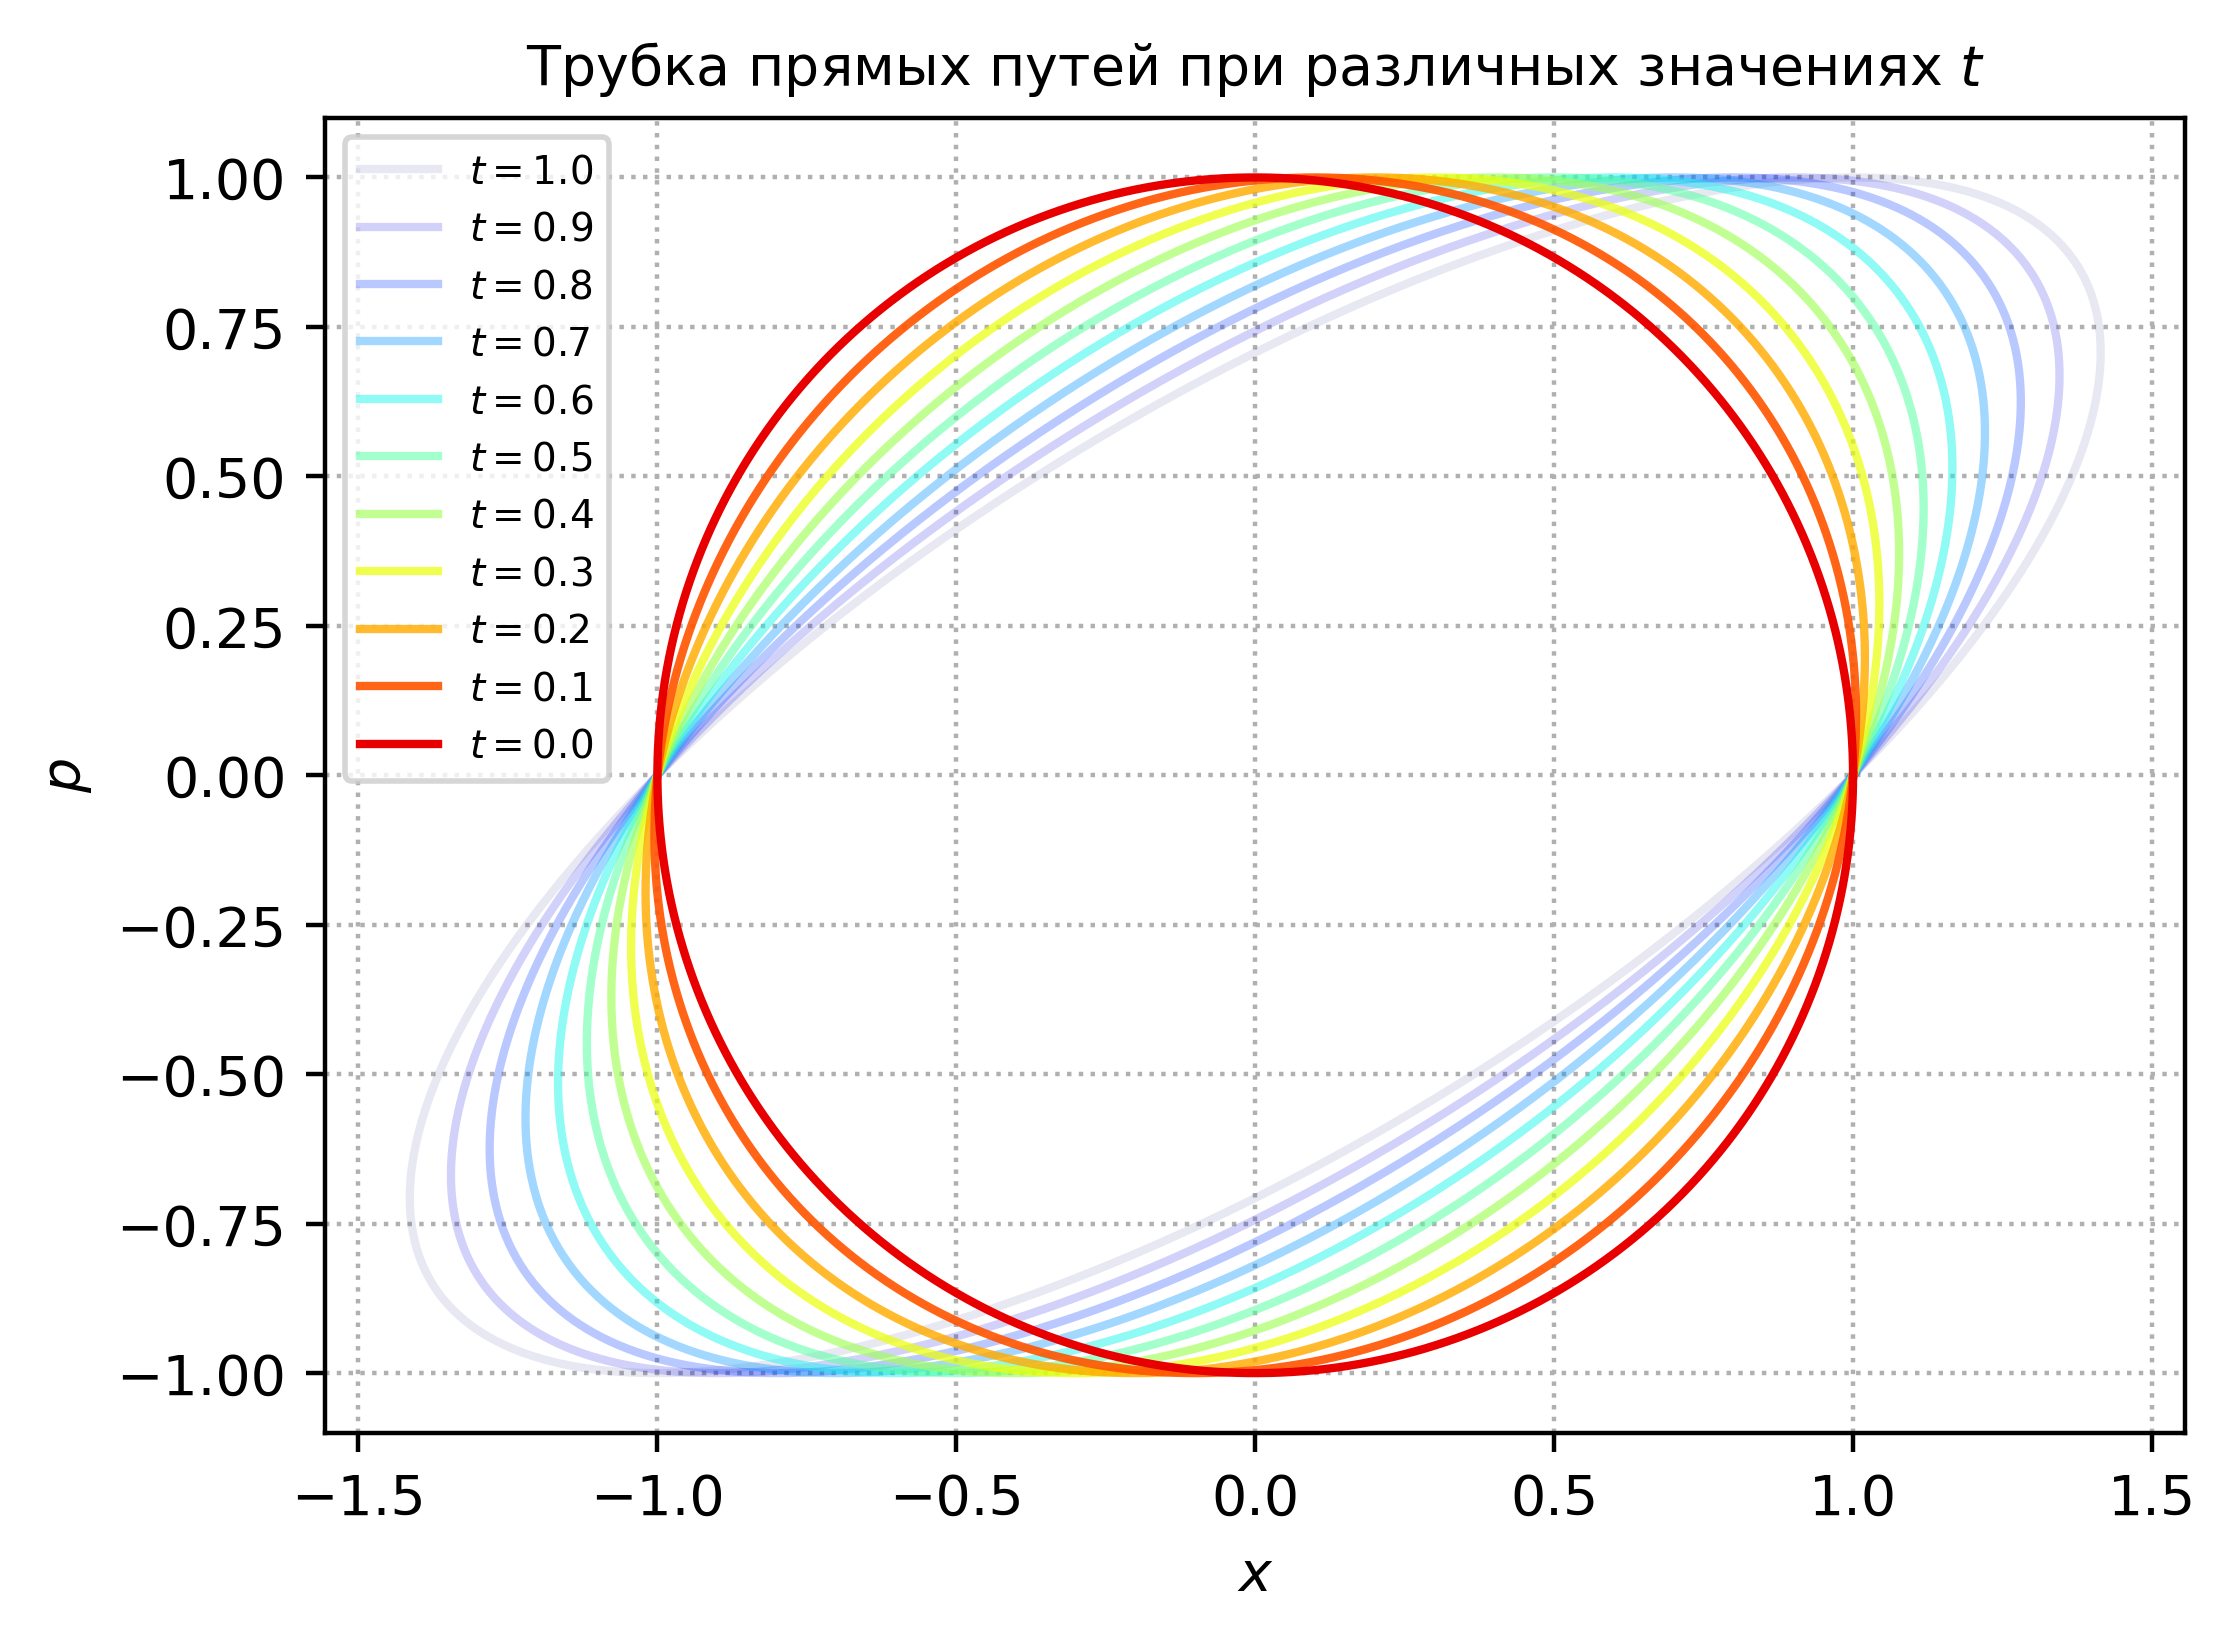

In [6]:
fig, ax = plt.subplots(figsize = (6, 6), dpi = 400)
ax.set_aspect('equal')


for ind, x in enumerate(x_different_t[::-1]):
    ax.plot(x, 
            p, 
            alpha = (ind + 1) /(t.shape[0]),
            label = f'$t = {t[::-1][ind]:.1f}$',
            color = cm.jet(ind /(t.shape[0])))
ax.legend(loc = 'upper left',
          fontsize = 7)
plt.grid(ls = ':')
plt.title("Трубка прямых путей при различных значениях $t$",
          fontsize = 10)
plt.xlabel('$x$', fontsize = 10)
plt.ylabel('$p$', fontsize = 10);

In [8]:
t = np.arange(0, 1.1, 0.01)
alpha = np.linspace(0, 2 * np.pi, 1000)

x_different_t = t[:, np.newaxis] * np.sin(alpha) + np.cos(alpha)
p = np.sin(alpha)


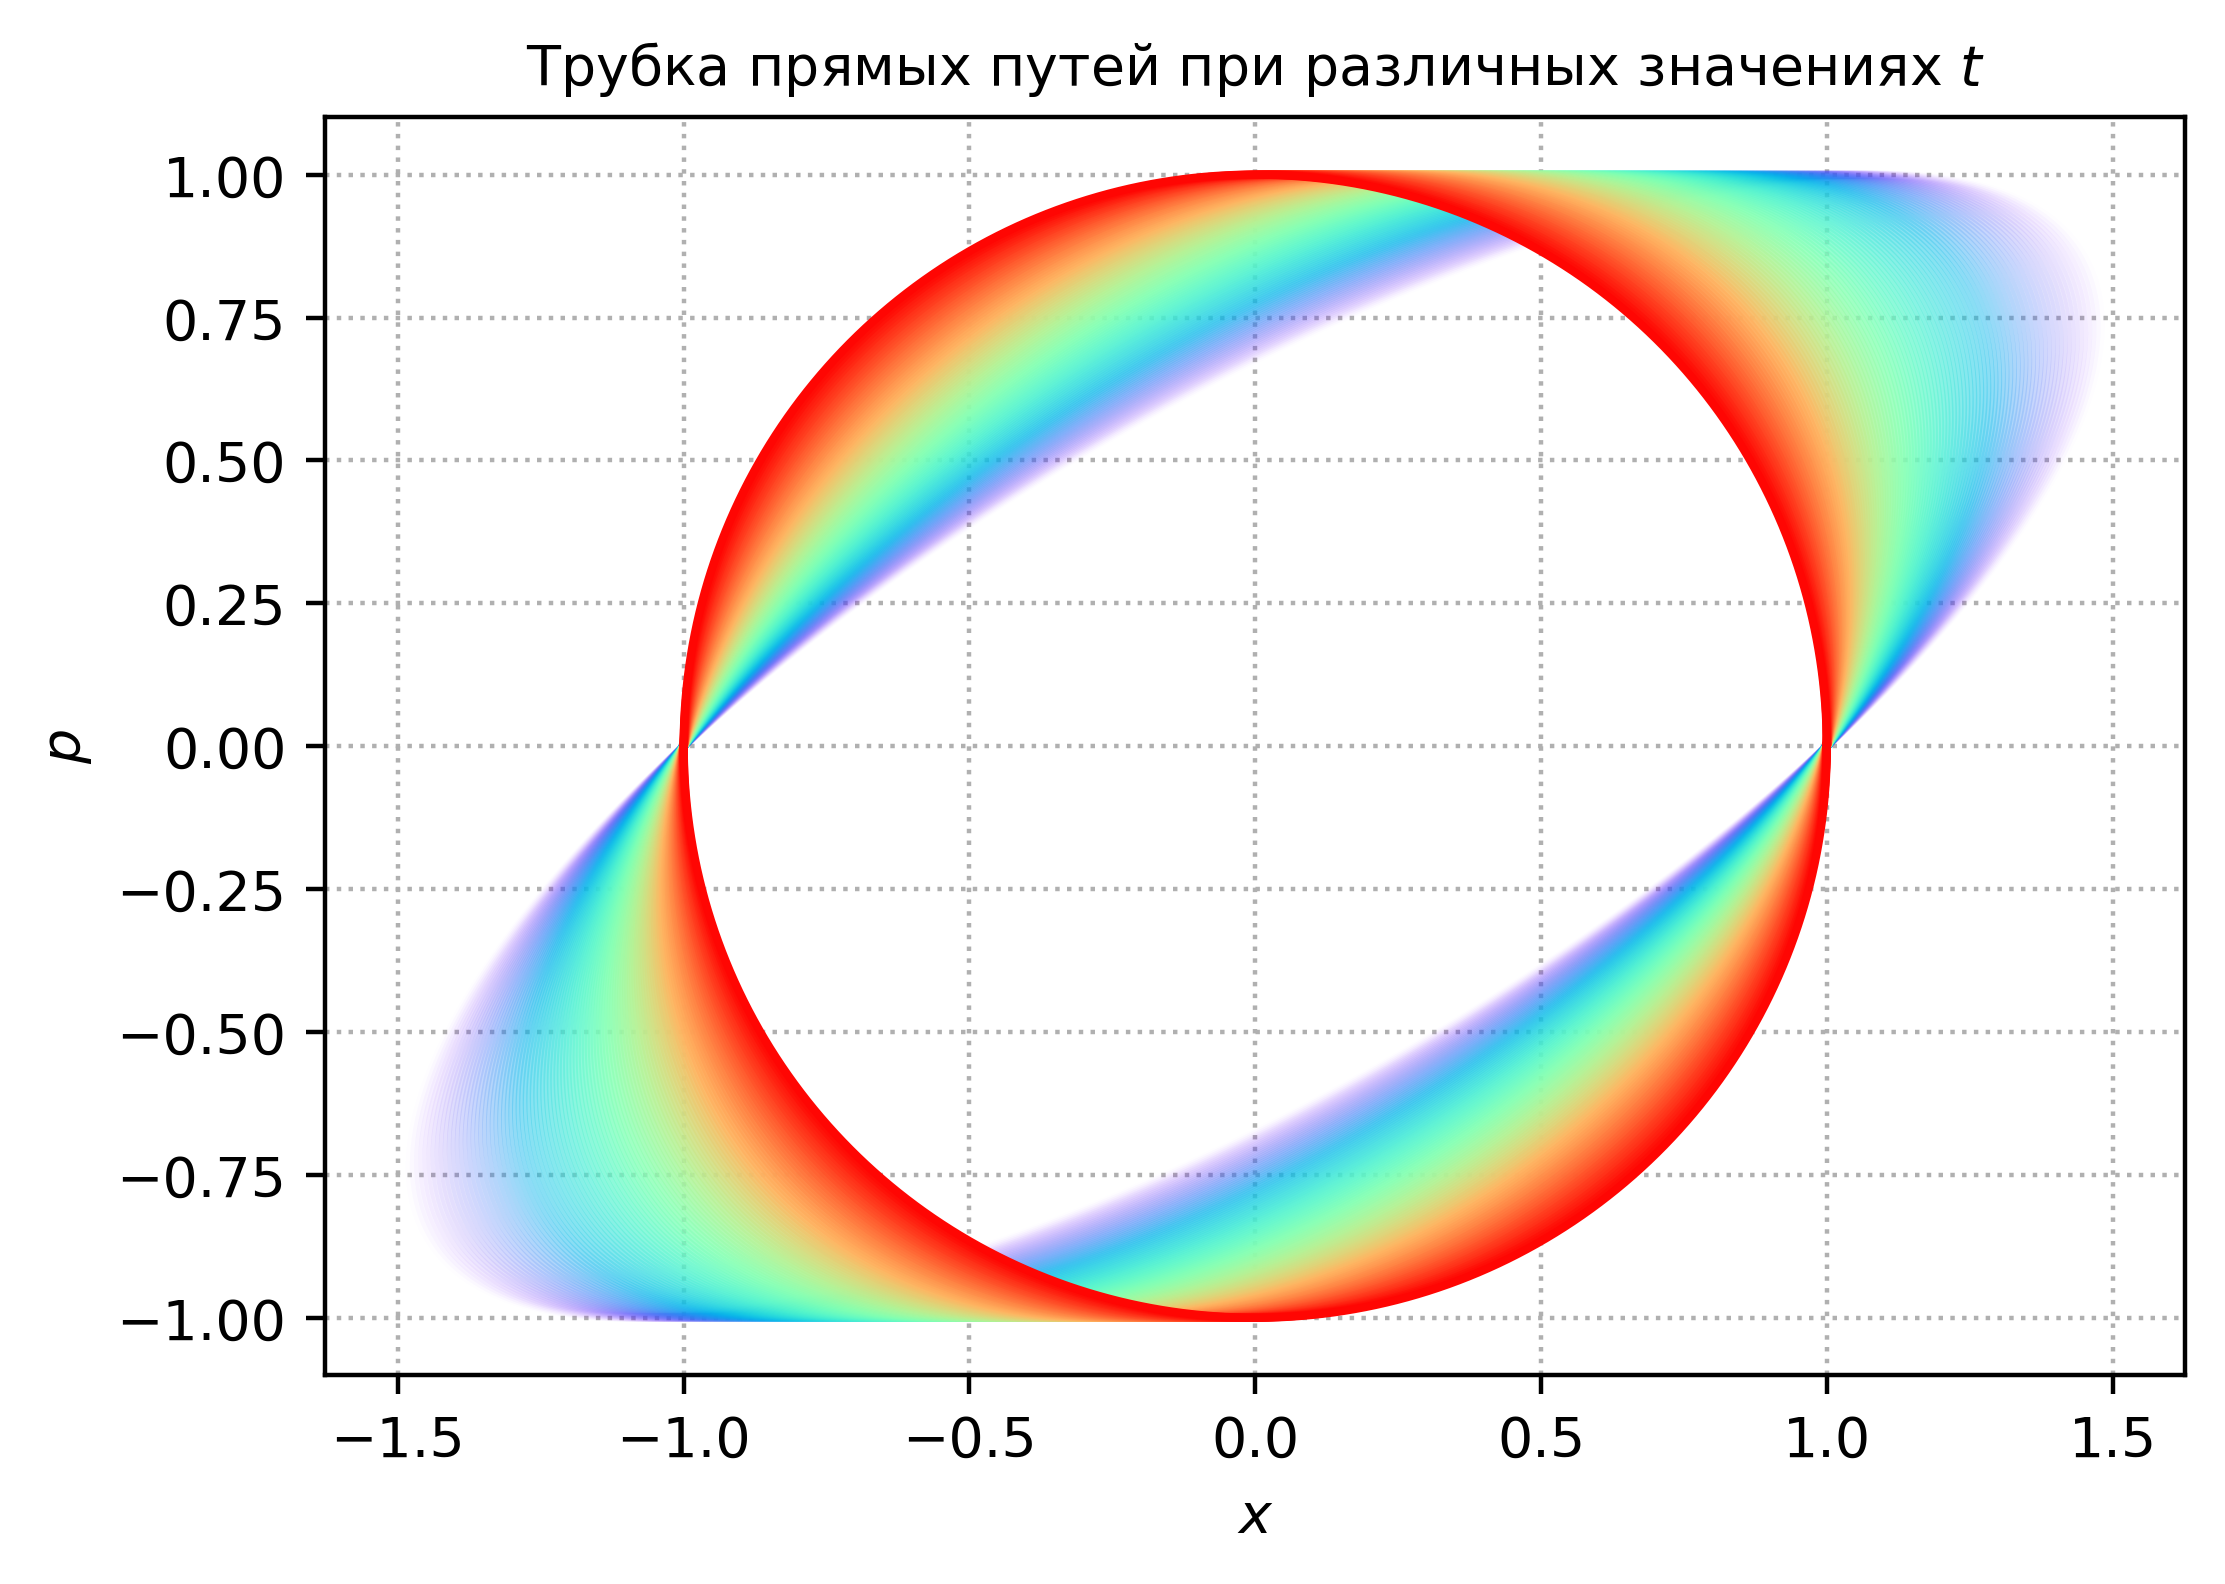

In [10]:
fig, ax = plt.subplots(figsize = (6, 6), dpi = 400)
ax.set_aspect('equal')


for ind, x in enumerate(x_different_t[::-1]):
    ax.plot(x, 
            p, 
            alpha = (ind + 1) /(t.shape[0]),
            color = cm.rainbow(ind /(t.shape[0])))
plt.grid(ls = ':')
plt.title("Трубка прямых путей при различных значениях $t$",
          fontsize = 10)
plt.xlabel('$x$', fontsize = 10)
plt.ylabel('$p$', fontsize = 10);

### Расширенное фазовое пространство $(x, p, t)$

In [3]:
t = np.arange(0, 2.5, 0.01)
alpha = np.linspace(0, 2 * np.pi, 1000)

x_different_t = t[:, np.newaxis] * np.sin(alpha) + np.cos(alpha)
p_different_t = np.array([np.sin(alpha) for _ in t])

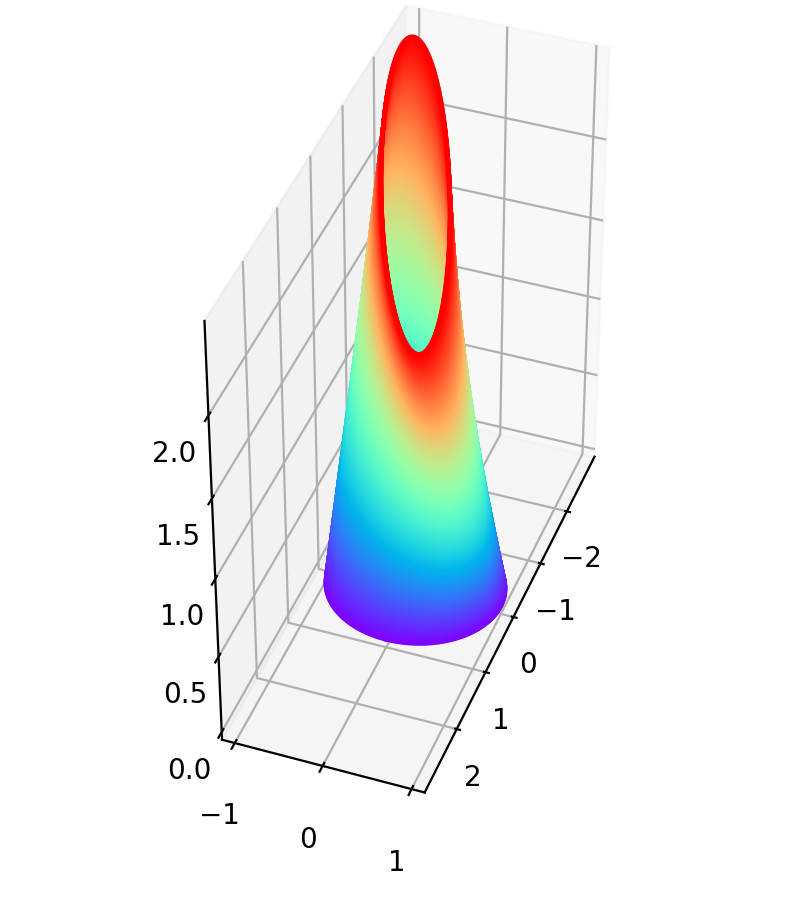

In [6]:
fig = plt.figure(figsize = (12, 5), dpi = 200)
ax = plt.axes(projection = '3d')
ax.view_init(40, 20)
ax.set_box_aspect([4,1.6,4])
# ax.set_xticks([])  
ax.set_yticks(np.arange(-1, 1.5, 1))  
# ax.set_zticks([]) 
# ax.set_xlim(-2, 2) 
# ax.set_ylim(-2, 2)
step = 1

for ind, (time, x, p) in enumerate(zip(t[::step], x_different_t[::step], p_different_t[::step])):
    ax.plot3D(x, p, time, 
              color = cm.rainbow(ind / (t[::step].shape[0])))

### Анимация

In [3]:
t = np.arange(0, 2.5, 0.004)
alpha = np.linspace(0, 2 * np.pi, 1000)

x_different_t = t[:, np.newaxis] * np.sin(alpha) + np.cos(alpha)
p_different_t = np.array([np.sin(alpha) for _ in t])

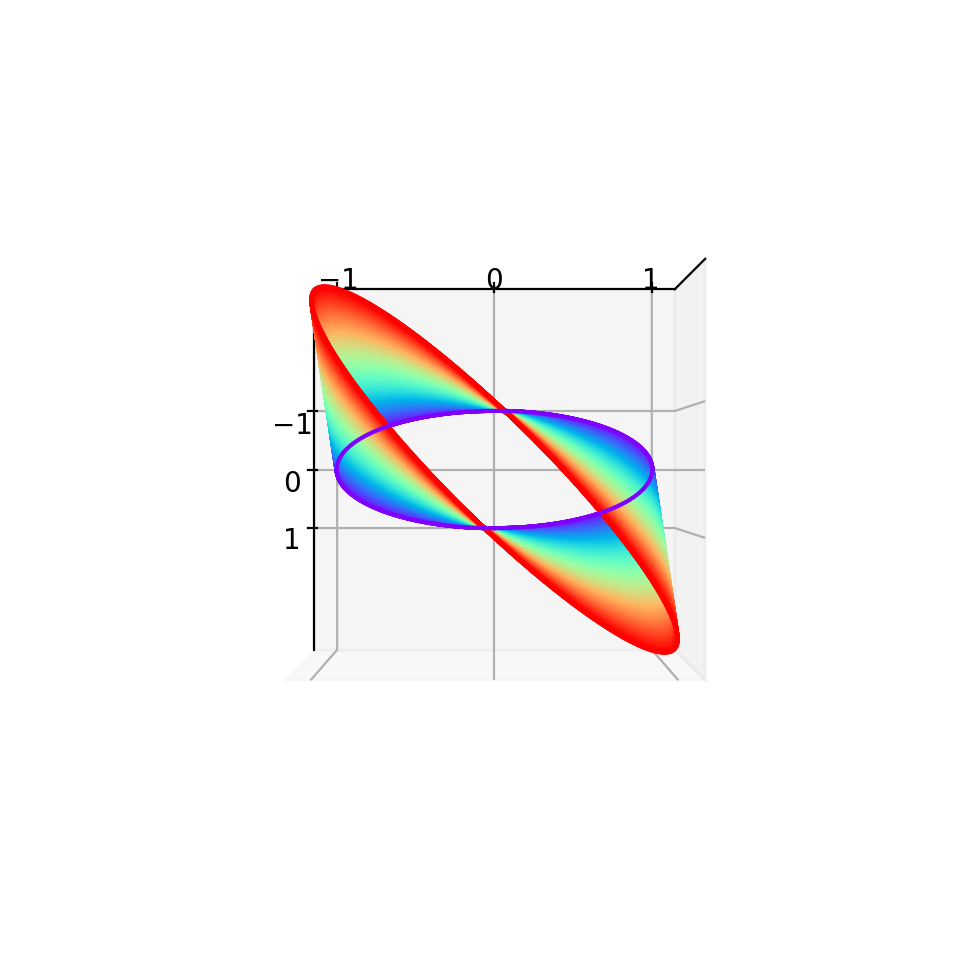

In [8]:
fig = plt.figure(figsize = (6, 6), dpi = 200)
ax = plt.axes(projection = '3d')
ax.view_init(90, 20)
ax.set_box_aspect([2,2,4])
ax.set_yticks(np.arange(-1, 1.5, 1))
ax.set_xticks(np.arange(-1, 1.5, 1))  
ax.set_zticks([])
step = 1
ax.plot3D(x_different_t[0], p_different_t[0], t[0], color = cm.rainbow(0))

def animate(frame: int) -> None:
    ax.set_box_aspect([2 + 2 * frame / t.shape[0],
                       2 - 0.4 * frame / t.shape[0],
                       4])
    ax.set_yticks(np.arange(-1, 1.5, 1))
    ax.view_init(90 - 40 * np.abs(np.sin(2* np.pi * frame / t.shape[0])), 
                 0 + 180 * np.sin(2 * np.pi * frame / t.shape[0]))
    ind = frame * step
    time, x, p = t[ind], x_different_t[ind], p_different_t[ind]
    ax.plot3D(x, p, time, color = cm.rainbow(frame / (t[::step].shape[0])))

ani = FuncAnimation(fig, animate, frames = t.shape[0], interval = 60)
ani.save('animation_10_1.gif',
         writer = 'ffmpeg',
         fps = 60,
         dpi = 200)

### Для последующей анимации в `blender`

In [200]:
t = np.arange(0, 10, 0.001)
alpha = np.linspace(0, 2 * np.pi, 1000)

x_different_t = t[:, np.newaxis] * np.sin(alpha) + np.cos(alpha)
p_different_t = np.array([np.sin(alpha) for _ in t])

In [201]:
np.save("x_different_t.npy", x_different_t)
np.save("p_different_t.npy", p_different_t)
np.save("t.npy", t)